# Leads Score Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

## Goals of the Case Study

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Step 1: Importing Libraries and Reading Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary libraries
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading the 'Leads' dataset into 'df'
df = pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

### Step 2: Inspecting the Dataframe

In [4]:
# Let's see the head of our master dataset
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [5]:
# Let's check the dimensions of the dataframe
df.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [7]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#Checking the duplicate records in the dataset
df[df.duplicated()]

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]

We can see that there are no duplicate records in the dataset.

### Step 3: Clean the data

**Checking for missing values**

In [9]:
# percentage of missing values present in the dataset.
round(100*(df.isnull().sum())/len(df), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Let's drop the columns with more than 30% missing values, as imputing values to these variables will lead to exaggerated results in our analysis.

In [10]:
#dropping the columns with more than 30% missing values and storing the new dataframe 'Leads'
Leads = df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score',
                 'Asymmetrique Profile Index','Tags'],axis=1)

In [11]:
# percentage of missing values present in the dataset.
round(100*(Leads.isnull().sum())/len(Leads), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Ad

In [12]:
#columns with more than 15% missing values
percent_missing = round(Leads.isnull().sum() * 100 / len(Leads),2)
missing_value_df = pd.DataFrame({'column_name': Leads.columns,
                                 'percent_missing': percent_missing})
missing_greaterthan_15 = missing_value_df[(percent_missing>15)].sort_values(by='percent_missing',ascending=False)
missing_greaterthan_15

column_name  \
What matters most to you in choosing a course  What matters most to you in choosing a course   
Lead Profile                                                                    Lead Profile   
What is your current occupation                              What is your current occupation   
Country                                                                              Country   
How did you hear about X Education                        How did you hear about X Education   
Specialization                                                                Specialization   
City                                                                                    City   

                                               percent_missing  
What matters most to you in choosing a course            29.32  
Lead Profile                                             29.32  
What is your current occupation                          29.11  
Country                                                  26.63  
How did you hear about X Education                       23.89  
Specialization                                           15.56  
City                                                     15.37

In [13]:
# Get the value counts of all the columns with more than 15% missing values
for column in missing_greaterthan_15.column_name:
    print(Leads[column].value_counts())
    print('No.of missing values:',Leads[column].isnull().sum())
    print('---------------------------------------------------')

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64
No.of missing values: 2709
---------------------------------------------------
Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64
No.of missing values: 2709
---------------------------------------------------
What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64
No.of missing values: 2690
---------------------------------------------------
Country
India                   6492
United States             69
United Arab Emirates      53
Singapo

**Dropping Columns**
- Almost all values present in 'What matters most to you in choosing a course' column are 'Better Career Prospects'. We are not getting much different information for analysis from this column.

- 'What is your current occupation' column has 'Unemployed' or missing values. 

- 70% of the customers are from 'India' and 26% of the customers 'Country' details are missing.

- 'Select' means customer had not selected this option while filling the form. As there are more number of 'Select' category values in 'Lead Profile', 'How did you hear about X Education'. 'Select' and missing values in these columns are more than 30%. Let's drop these columns.

In [14]:
#Dropping the columns with more than 15% missing values
Leads = Leads.drop(['What matters most to you in choosing a course','What is your current occupation','Country', 'Lead Profile', 
                    'How did you hear about X Education'],axis=1)

**Imputing the missing values**

- Imputing rows with missing values in 'Specialization' and 'City' with 'Select'. 'Select' value in these columns mean customer have not selected this information while filling the forms.

In [15]:
#Filling the records where 'Specialization' and 'City' columns has missing values with 'Select'
cols= ['Specialization','City']
for column in cols:
    Leads[column] = Leads[column].fillna('Select')

In [16]:
#percentage of missing values present in the dataset.
round(100*(Leads.isnull().sum())/len(Leads), 2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
Lead Source                                 0.39
Prospect ID                                 0.00
X Education Forums                          0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
Magazine                                    0.00
Newspaper Article                           0.00
Lead Number                                 0.00
Search                                      0.00
Specialization                              0.00
Total Time Spent on 

In [17]:
#missing values columns
percent_missing1 = round(Leads.isnull().sum() * 100 / len(Leads),2)
missing_value_df1 = pd.DataFrame({'column_name': Leads.columns,
                                 'percent_missing': percent_missing1})
missing_greaterthan_0 = missing_value_df1[(percent_missing1>0)].sort_values(by='percent_missing',ascending=False)
missing_greaterthan_0

column_name  percent_missing
TotalVisits                    TotalVisits             1.48
Page Views Per Visit  Page Views Per Visit             1.48
Last Activity                Last Activity             1.11
Lead Source                    Lead Source             0.39

In [18]:
# Get the value counts of all the columns with missing values
for column in missing_greaterthan_0.column_name:
    print(Leads[column].value_counts())
    print('No.of missing values:',Leads[column].isnull().sum())
    print('---------------------------------------------------')

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64
No.of missing values: 137
---------------------------------------------------
Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64
No.of missing values: 137
---------------------------------------------------
Last Activity
Email Opened   

As missing values are very few in number compared to the total number of records, it is safe to impute them with mode of the variable.

In [19]:
#Imputing the missing values with mode 
for column in missing_greaterthan_0.column_name:
    Leads[column].fillna(Leads[column].mode()[0],inplace=True)

In [20]:
# percentage of missing values present in the dataset.
round(100*(Leads.isnull().sum())/len(Leads), 2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

Now we don't have any missing values.

In [21]:
#Printing the number of unique values present in each column
df_cat = pd.DataFrame(Leads.nunique())
df_cat.reset_index(inplace=True)
df_cat.rename(columns={'index':'Column',0:'Category'}, inplace=True)
print(df_cat)

                                      Column  Category
0                                Prospect ID      9240
1                                Lead Number      9240
2                                Lead Origin         5
3                                Lead Source        21
4                               Do Not Email         2
5                                Do Not Call         2
6                                  Converted         2
7                                TotalVisits        41
8                Total Time Spent on Website      1731
9                       Page Views Per Visit       114
10                             Last Activity        17
11                            Specialization        19
12                                    Search         2
13                                  Magazine         1
14                         Newspaper Article         2
15                        X Education Forums         2
16                                 Newspaper         2
17        

In [22]:
#Let's drop the columns containing one unique value as they are of no use for our analysis
Leads = Leads.drop(['Magazine','Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                    'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1)

In [23]:
#Printing value counts for columns with 2 categories
for column in df_cat[df_cat.Category==2].Column:
    print(Leads[column].value_counts())
    print('---------------------------------------------------')

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
---------------------------------------------------
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
---------------------------------------------------
Converted
0    5679
1    3561
Name: count, dtype: int64
---------------------------------------------------
Search
No     9226
Yes      14
Name: count, dtype: int64
---------------------------------------------------
Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64
---------------------------------------------------
X Education Forums
No     9239
Yes       1
Name: count, dtype: int64
---------------------------------------------------
Newspaper
No     9239
Yes       1
Name: count, dtype: int64
---------------------------------------------------
Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64
---------------------------------------------------
Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64
---

In [24]:
#Let's drop the variables whose values are almost all 'No' and hardly any 'Yes'
Leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
            'Through Recommendations'], axis=1,inplace=True)

In [25]:
#Checking the value counts of all the variables present in the dataset
for column in Leads.columns:
    print(Leads[column].value_counts())
    print('---------------------------------------------------')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
---------------------------------------------------
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
---------------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


In [26]:
Leads.shape

(9240, 14)

In [27]:
Leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization    City A free copy of Mastering The Interview  \
0                   Select  Select                                     No   
1                   Select  Select                                     No   
2  Business Administration  Mumbai                                    Yes   
3    Media and Advertising  Mumbai                                     No   
4                   Select  Mumbai                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

#### Checking for Outliers

In [28]:
# Checking for outliers in the continuous variables
num_Leads = Leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [29]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_Leads.describe(percentiles=[.25, .5, .75, .90, .95, .97, .99])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.394156                   487.698268              2.327787
std       4.836682                   548.021466              2.164258
min       0.000000                     0.000000              0.000000
25%       0.000000                    12.000000              0.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
90%       7.000000                  1380.000000              5.000000
95%      10.000000                  1562.000000              6.000000
97%      11.000000                  1660.000000              7.000000
99%      17.000000                  1840.610000              9.000000
max     251.000000                  2272.000000             55.000000

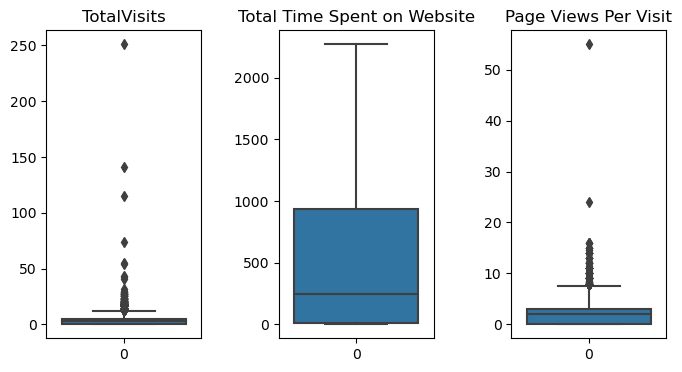

In [30]:
#Plotting box plots for numerical columns to find outliers using for loop
plt.figure(figsize=(8,4))
plt.subplots_adjust(wspace=0.5,hspace=0.2)
for i,col in enumerate(num_Leads.columns):
    plt.subplot(1,3,i+1)
    sns.boxplot(num_Leads[col])
    plt.title(col)
plt.show()    

As there are outliers towards the upper level in `TotalVisits` and `Page Views Per Visit` columns let us cap the outliers with Quartile3+1.5*IQR

In [31]:
#Capping outliers with upper_limit value using for loop in the 'Leads' dataframe
from scipy import stats
num_col = ['TotalVisits','Page Views Per Visit']
for col in num_col:
    IQR = stats.iqr(Leads[col], interpolation = 'midpoint')
    upper_limit = np.percentile(Leads[col],75,interpolation = 'midpoint')+1.5*IQR
    Leads[col] = np.where(Leads[col]> upper_limit, upper_limit,
                        Leads[col])

In [32]:
Leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9240.000000                  9240.000000   
mean   617188.435606     0.385390     3.213853                   487.698268   
std     23405.995698     0.486714     3.005136                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     0.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000    12.500000                  2272.000000   

       Page Views Per Visit  
count           9240.000000  
mean               2.274987  
std                1.917776  
min                0.000000  
25%                0.000000  
50%                2.000000  
75%                3.000000  
max                7.500000

### Step 4: Visualising the Data

**Let's understanding the data**.
We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's create a pairplot of all the numeric variables present in the dataframe.

<Figure size 1500x800 with 0 Axes>

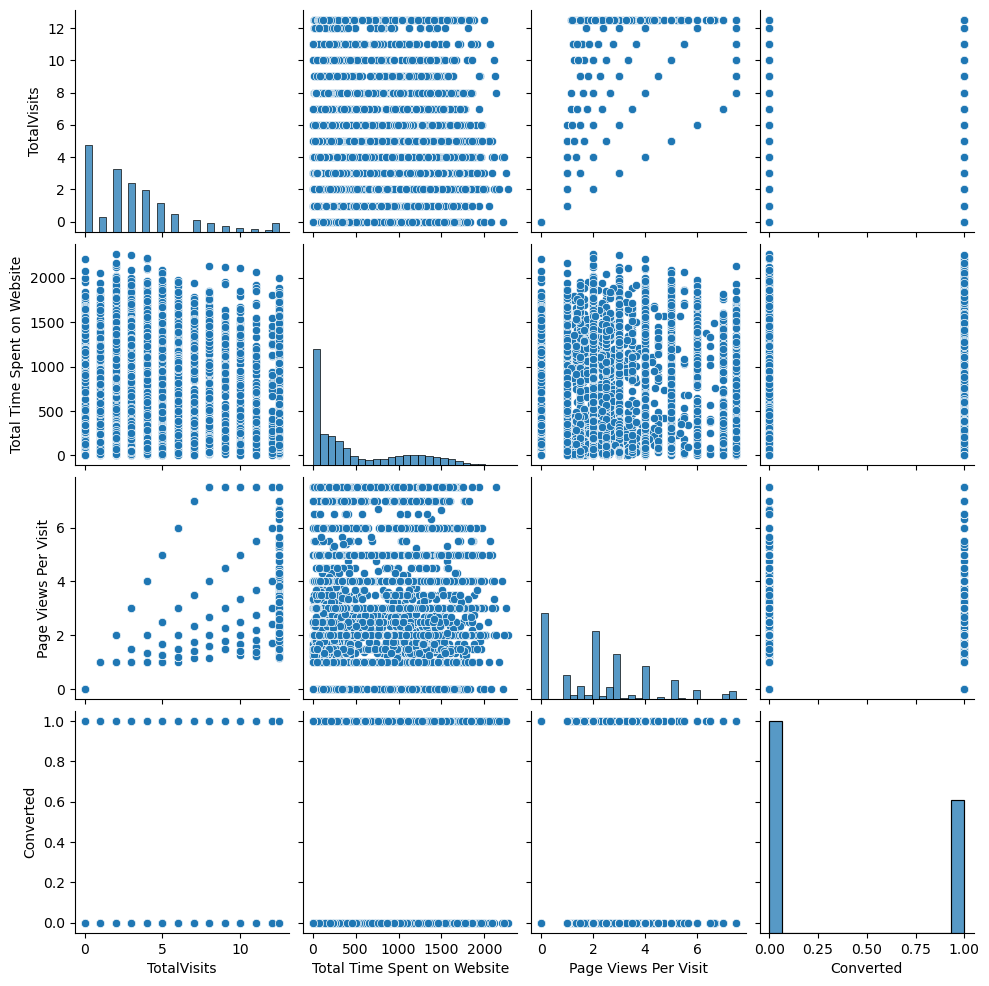

In [33]:
plt.figure(figsize = (15,8))        # Size of the figure
sns.pairplot(Leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']])
plt.show()

From the above graph, we can observe that `TotalVisits` are high in the customers who are not `Converted`.

#### Visualising Categorical Variables

Let's create a countplot for all the categorical variables present in the dataframe.

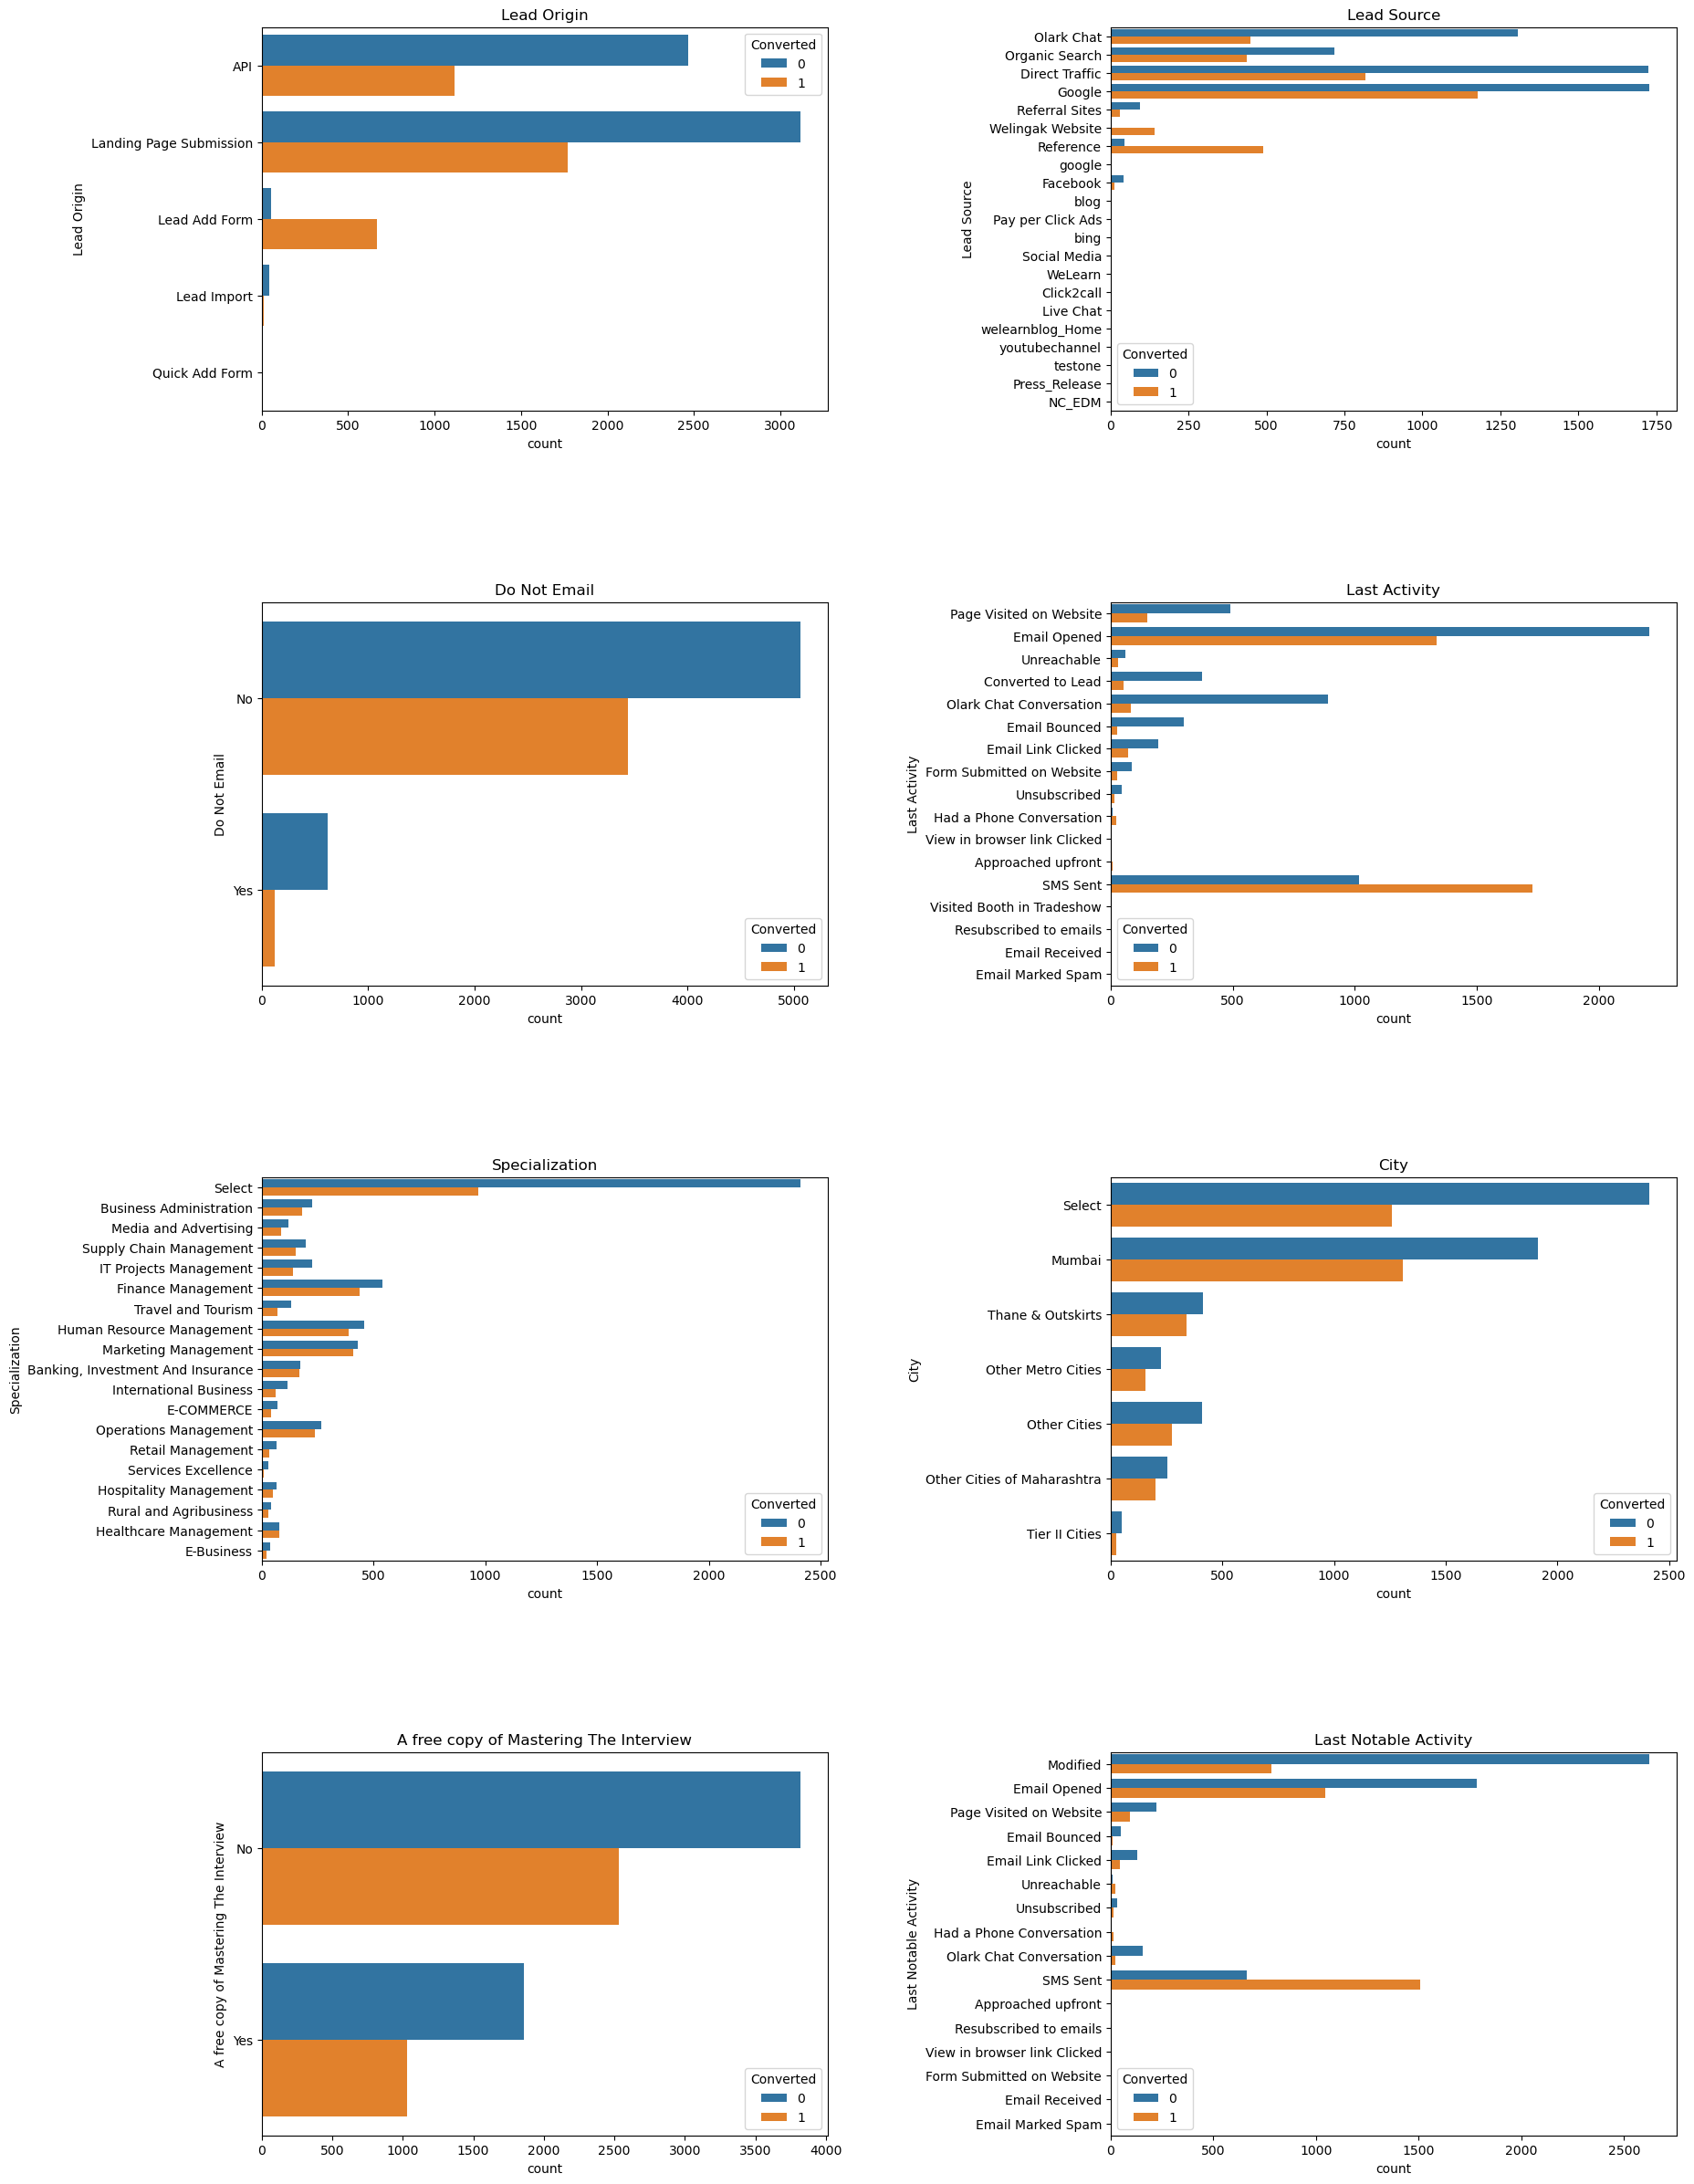

In [34]:
cols=['Lead Origin','Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'City',
      'A free copy of Mastering The Interview','Last Notable Activity']
plt.figure(figsize=(20,30))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
for i,col in enumerate(cols):
    plt.subplot(4,2,i+1)
    sns.countplot(data=Leads, y=col ,hue='Converted')
    plt.title(col)
plt.show()    

Customers whose `Last Activity` are `Email Opened` or `SMS Sent` are most likely to be converted to successful lead.

Customers whose `Lead Source` is `Google` are more likely to be successful lead.

### Step 5: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [35]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads[varlist] = Leads[varlist].apply(binary_map)

In [36]:
Leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization    City  A free copy of Mastering The Interview  \
0                   Select  Select                                       0   
1                   Select  Select                                       0   
2  Business Administration  Mumbai                                       1   
3    Media and Advertising  Mumbai                                       0   
4                   Select  Mumbai                                       0   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [37]:
#Checking the value counts of all the variables present in the dataset
for column in Leads.columns:
    print(Leads[column].value_counts())
    print('---------------------------------------------------')

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
---------------------------------------------------
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
---------------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [38]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True, dtype = int)

# Adding the results to the master dataframe
Leads = pd.concat([Leads, dummy1], axis=1)

In [39]:
Leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ... Last Notable Activity_Form Submitted on Website  \
0  ...                                               0   
1  ...                                               0   
2  ...                                               0   
3  ...                                               0   
4  ...                                               0   

  Last Notable Activity_Had a Phone Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

  Last Notable Activity_Olark Chat Conversation  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                      

In [40]:
# Creating dummy variables for 'Specialization' and 'City' columns and dropping the 'Select' columns of both the variables.

# Creating dummy variables for the variable 'Specialization'
SP = pd.get_dummies(Leads['Specialization'], prefix='Specialization', dtype = int)
# Dropping MultipleLines_No phone service column
SP1 = SP.drop(['Specialization_Select'], axis = 1)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,SP1], axis=1)

# Creating dummy variables for the variable 'City'.
City = pd.get_dummies(Leads['City'], prefix='City', dtype = int)
City1 = City.drop(['City_Select'], axis = 1)
# Adding the results to the master dataframe
Leads = pd.concat([Leads,City1], axis=1)

In [41]:
Leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ... Specialization_Rural and Agribusiness  \
0  ...                                     0   
1  ...                                     0   
2  ...                                     0   
3  ...                                     0   
4  ...                                     0   

  Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                  0                                       0   
1                                  0                                       0   
2                                  0                                       0   
3                                  0                                       0   
4                                  0                                       0   

  Specialization_Travel and Tourism  City_Mumbai  City_Other Cities  \
0                                 0            0                  0   
1                                 0            0                  0   
2                                 0            1                  0   
3                                 0            1                  0   
4                                 0            1                  0   

   City_Other Cities of Maharashtra  City_Other Metro Cities  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   

   City_Thane & Outskirts  City_Tier II Cities  
0                       0                    0  
1                       0                    0  
2                       0                    0  
3                       0                    0  
4                       0                    0  

[5 rows x 93 columns]

#### Dropping the repeated variables

In [42]:
# We have created dummies for the below variables, so we can drop them
Leads = Leads.drop(['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Specialization', 'City'], axis = 1)

In [43]:
#Printing info of the Leads dataframe
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Prospect ID                                         9240 non-null   object 
 1   Lead Number                                         9240 non-null   int64  
 2   Do Not Email                                        9240 non-null   int64  
 3   Converted                                           9240 non-null   int64  
 4   TotalVisits                                         9240 non-null   float64
 5   Total Time Spent on Website                         9240 non-null   int64  
 6   Page Views Per Visit                                9240 non-null   float64
 7   A free copy of Mastering The Interview              9240 non-null   int64  
 8   Lead Origin_Landing Page Submission                 9240 non-null   int32  
 9

### Step 6: Test-Train Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Putting feature variable to X
X = Leads.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  ...  Specialization_Rural and Agribusiness  \
0                           0  ...                                      0   
1                           0  ...                                      0   
2                           1  ...                                      0   
3                           1  ...                                      0   
4                           0  ...                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  City_Mumbai  City_Other Cities  \
0                                  0            0                  0   
1                                  0            0                  0   
2                                  0            1                  0   
3                                  0            1                  0   
4                                  0            1                  0   

   City_Other Cities of Maharashtra  City_Other Metro Cities  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   

   City_Thane & Outskirts  City_Tier II Cities  
0                       0                    0  
1                       0                    0  
2                       0                    0  
3                       0                    0  
4                       0                    0  

[5 rows x 84 columns]

In [46]:
# Putting response variable to y
y = Leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [47]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 7: Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   Lead Source_Direct Traffic  ...  Specialization_Rural and Agribusiness  \
0                           0  ...                                      0   
1                           0  ...                                      0   
2                           1  ...                                      0   
3                           1  ...                                      0   
4                           0  ...                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  City_Mumbai  City_Other Cities  \
0                                  0            0                  0   
1                                  0            0                  0   
2                                  0            1                  0   
3                                  0            1                  0   
4                                  0            1                  0   

   City_Other Cities of Maharashtra  City_Other Metro Cities  \
0                                 0                        0   
1                                 0                        0   
2                                 0                        0   
3                                 0                        0   
4                                 0                        0   

   City_Thane & Outskirts  City_Tier II Cities  
0                       0                    0  
1                       0                    0  
2                       0                    0  
3                       0                    0  
4                       0                    0  

[5 rows x 84 columns]

In [50]:
Leads.describe()

Lead Number  Do Not Email    Converted  TotalVisits  \
count    9240.000000   9240.000000  9240.000000  9240.000000   
mean   617188.435606      0.079437     0.385390     3.213853   
std     23405.995698      0.270435     0.486714     3.005136   
min    579533.000000      0.000000     0.000000     0.000000   
25%    596484.500000      0.000000     0.000000     0.000000   
50%    615479.000000      0.000000     0.000000     3.000000   
75%    637387.250000      0.000000     1.000000     5.000000   
max    660737.000000      1.000000     1.000000    12.500000   

       Total Time Spent on Website  Page Views Per Visit  \
count                  9240.000000           9240.000000   
mean                    487.698268              2.274987   
std                     548.021466              1.917776   
min                       0.000000              0.000000   
25%                      12.000000              0.000000   
50%                     248.000000              2.000000   
75%                     936.000000              3.000000   
max                    2272.000000              7.500000   

       A free copy of Mastering The Interview  \
count                             9240.000000   
mean                                 0.312554   
std                                  0.463559   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  1.000000   
max                                  1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          9240.000000                9240.000000   
mean                              0.528788                   0.077706   
std                               0.499198                   0.267722   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  ...  Specialization_Rural and Agribusiness  \
count              9240.000000  ...                            9240.000000   
mean                  0.005952  ...                               0.007900   
std                   0.076926  ...                               0.088537   
min                   0.000000  ...                               0.000000   
25%                   0.000000  ...                               0.000000   
50%                   0.000000  ...                               0.000000   
75%                   0.000000  ...                               0.000000   
max                   1.000000  ...                               1.000000   

       Specialization_Services Excellence  \
count                         9240.000000   
mean                             0.004329   
std                              0.065656   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              0.000000   
max                              1.000000   

       Specialization_Supply Chain Management  \
count                             9240.000000   
mean                                 0.037771   
std                                  0.190651   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                                  1.000000   

       Specialization_Travel and Tourism  City_Mumbai  City_Other Cities  \
count                        9240.000000  9240.000000        9240.000000   
mean                            0.021970     0.348701           0.074242   
std         

In [51]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(
    X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871             0    -1.064974                    -0.885371   
6795             0     0.262370                     0.005716   
3516             0     0.594206                    -0.691418   
8105             0     0.594206                     1.365219   
3934             0    -1.064974                    -0.885371   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1871             -1.184892                                       0   
6795             -0.488713                                       1   
3516              0.123715                                       0   
8105              1.432322                                       0   
3934             -1.184892                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1871                                    0                          0   
6795                                    1                          0   
3516                                    0                          0   
8105                                    1                          0   
3934                                    0                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
1871                        0                           0   
6795                        0                           0   
3516                        0                           0   
8105                        0                           0   
3934                        0                           0   

      Lead Source_Direct Traffic  ...  Specialization_Rural and Agribusiness  \
1871                           0  ...                                      0   
6795                           1  ...                                      0   
3516                           0  ...                                      0   
8105                           0  ...                                      0   
3934                           0  ...                                      0   

      Specialization_Services Excellence  \
1871                                   0   
6795                                   0   
3516                                   0   
8105                                   1   
3934                                   0   

      Specialization_Supply Chain Management  \
1871                                       0   
6795                                       0   
3516                                       0   
8105                                       0   
3934                                       0   

      Specialization_Travel and Tourism  City_Mumbai  City_Other Cities  \
1871                                  0            0                  0   
6795                                  0            0                  1   
3516                                  0            0                  0   
8105                                  0            1                  0   
3934                                  0            0                  0   

      City_Other Cities of Maharashtra  City_Other Metro Cities  \
1871                                 0                        0   
6795                                 0                        0   
3516                                 0                        0   
8105                                 0                        0   
3934                                 0                        0   

      City_Thane & Outskirts  City_Tier II Cities  
1871                       0                    0  
6795                       0                    0  
3516                       0                    0  
8105                       0                    0  
3934                       0                    0  

[5 rows x 84 columns]

In [52]:
X_train.describe()

Do Not Email   TotalVisits  Total Time Spent on Website  \
count   6468.000000  6.468000e+03                 6.468000e+03   
mean       0.078386  1.098551e-18                -6.701161e-17   
std        0.268799  1.000077e+00                 1.000077e+00   
min        0.000000 -1.064974e+00                -8.853708e-01   
25%        0.000000 -1.064974e+00                -8.634138e-01   
50%        0.000000 -6.946596e-02                -4.352528e-01   
75%        0.000000  5.942058e-01                 8.098906e-01   
max        1.000000  3.082975e+00                 3.271816e+00   

       Page Views Per Visit  A free copy of Mastering The Interview  \
count          6.468000e+03                             6468.000000   
mean           6.508914e-17                                0.311843   
std            1.000077e+00                                0.463282   
min           -1.184892e+00                                0.000000   
25%           -1.184892e+00                                0.000000   
50%           -1.380066e-01                                0.000000   
75%            3.854361e-01                                1.000000   
max            2.740929e+00                                1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          6468.000000                6468.000000   
mean                              0.528139                   0.079468   
std                               0.499246                   0.270489   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
count              6468.000000                 6468.000000   
mean                  0.005102                    0.000155   
std                   0.071252                    0.012434   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                   1.000000                    1.000000   

       Lead Source_Direct Traffic  ...  Specialization_Rural and Agribusiness  \
count                 6468.000000  ...                            6468.000000   
mean                     0.271490  ...                               0.007267   
std                      0.444763  ...                               0.084940   
min                      0.000000  ...                               0.000000   
25%                      0.000000  ...                               0.000000   
50%                      0.000000  ...                               0.000000   
75%                      1.000000  ...                               0.000000   
max                      1.000000  ...                               1.000000   

       Specialization_Services Excellence  \
count                         6468.000000   
mean                             0.004793   
std                              0.069069   
min                              0.000000   
25%                              0.000000   
50%                              0.000000   
75%                              0.000000   
max                              1.000000   

       Specialization_Supply Chain Management  \
count                             6468.000000   
mean                                 0.037570   
std                                  0.190168   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  0.000000   
max                        

In [53]:
### Checking the Conversion Rate
converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
converted

38.53896103896104

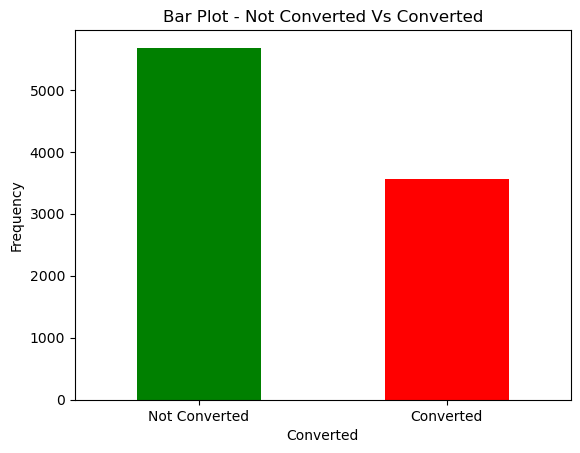

In [54]:
#PLotting a bar plot to see the frequency of the converted "1" and not converted "0" Leads present in the data frame
plt.title("Bar Plot - Not Converted Vs Converted")
Leads.Converted.value_counts().plot.bar(color=['green','red'])
plt.xlabel('Converted')
plt.ylabel('Frequency')
plt.xticks((0,1),["Not Converted","Converted"],rotation=0)
plt.show()

We have around 38% conversion rate

### Step 8: Looking at Correlations

In [55]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
Lead = Leads
Lead.drop(['Prospect ID','Lead Number','Converted'],inplace=True, axis = 1)

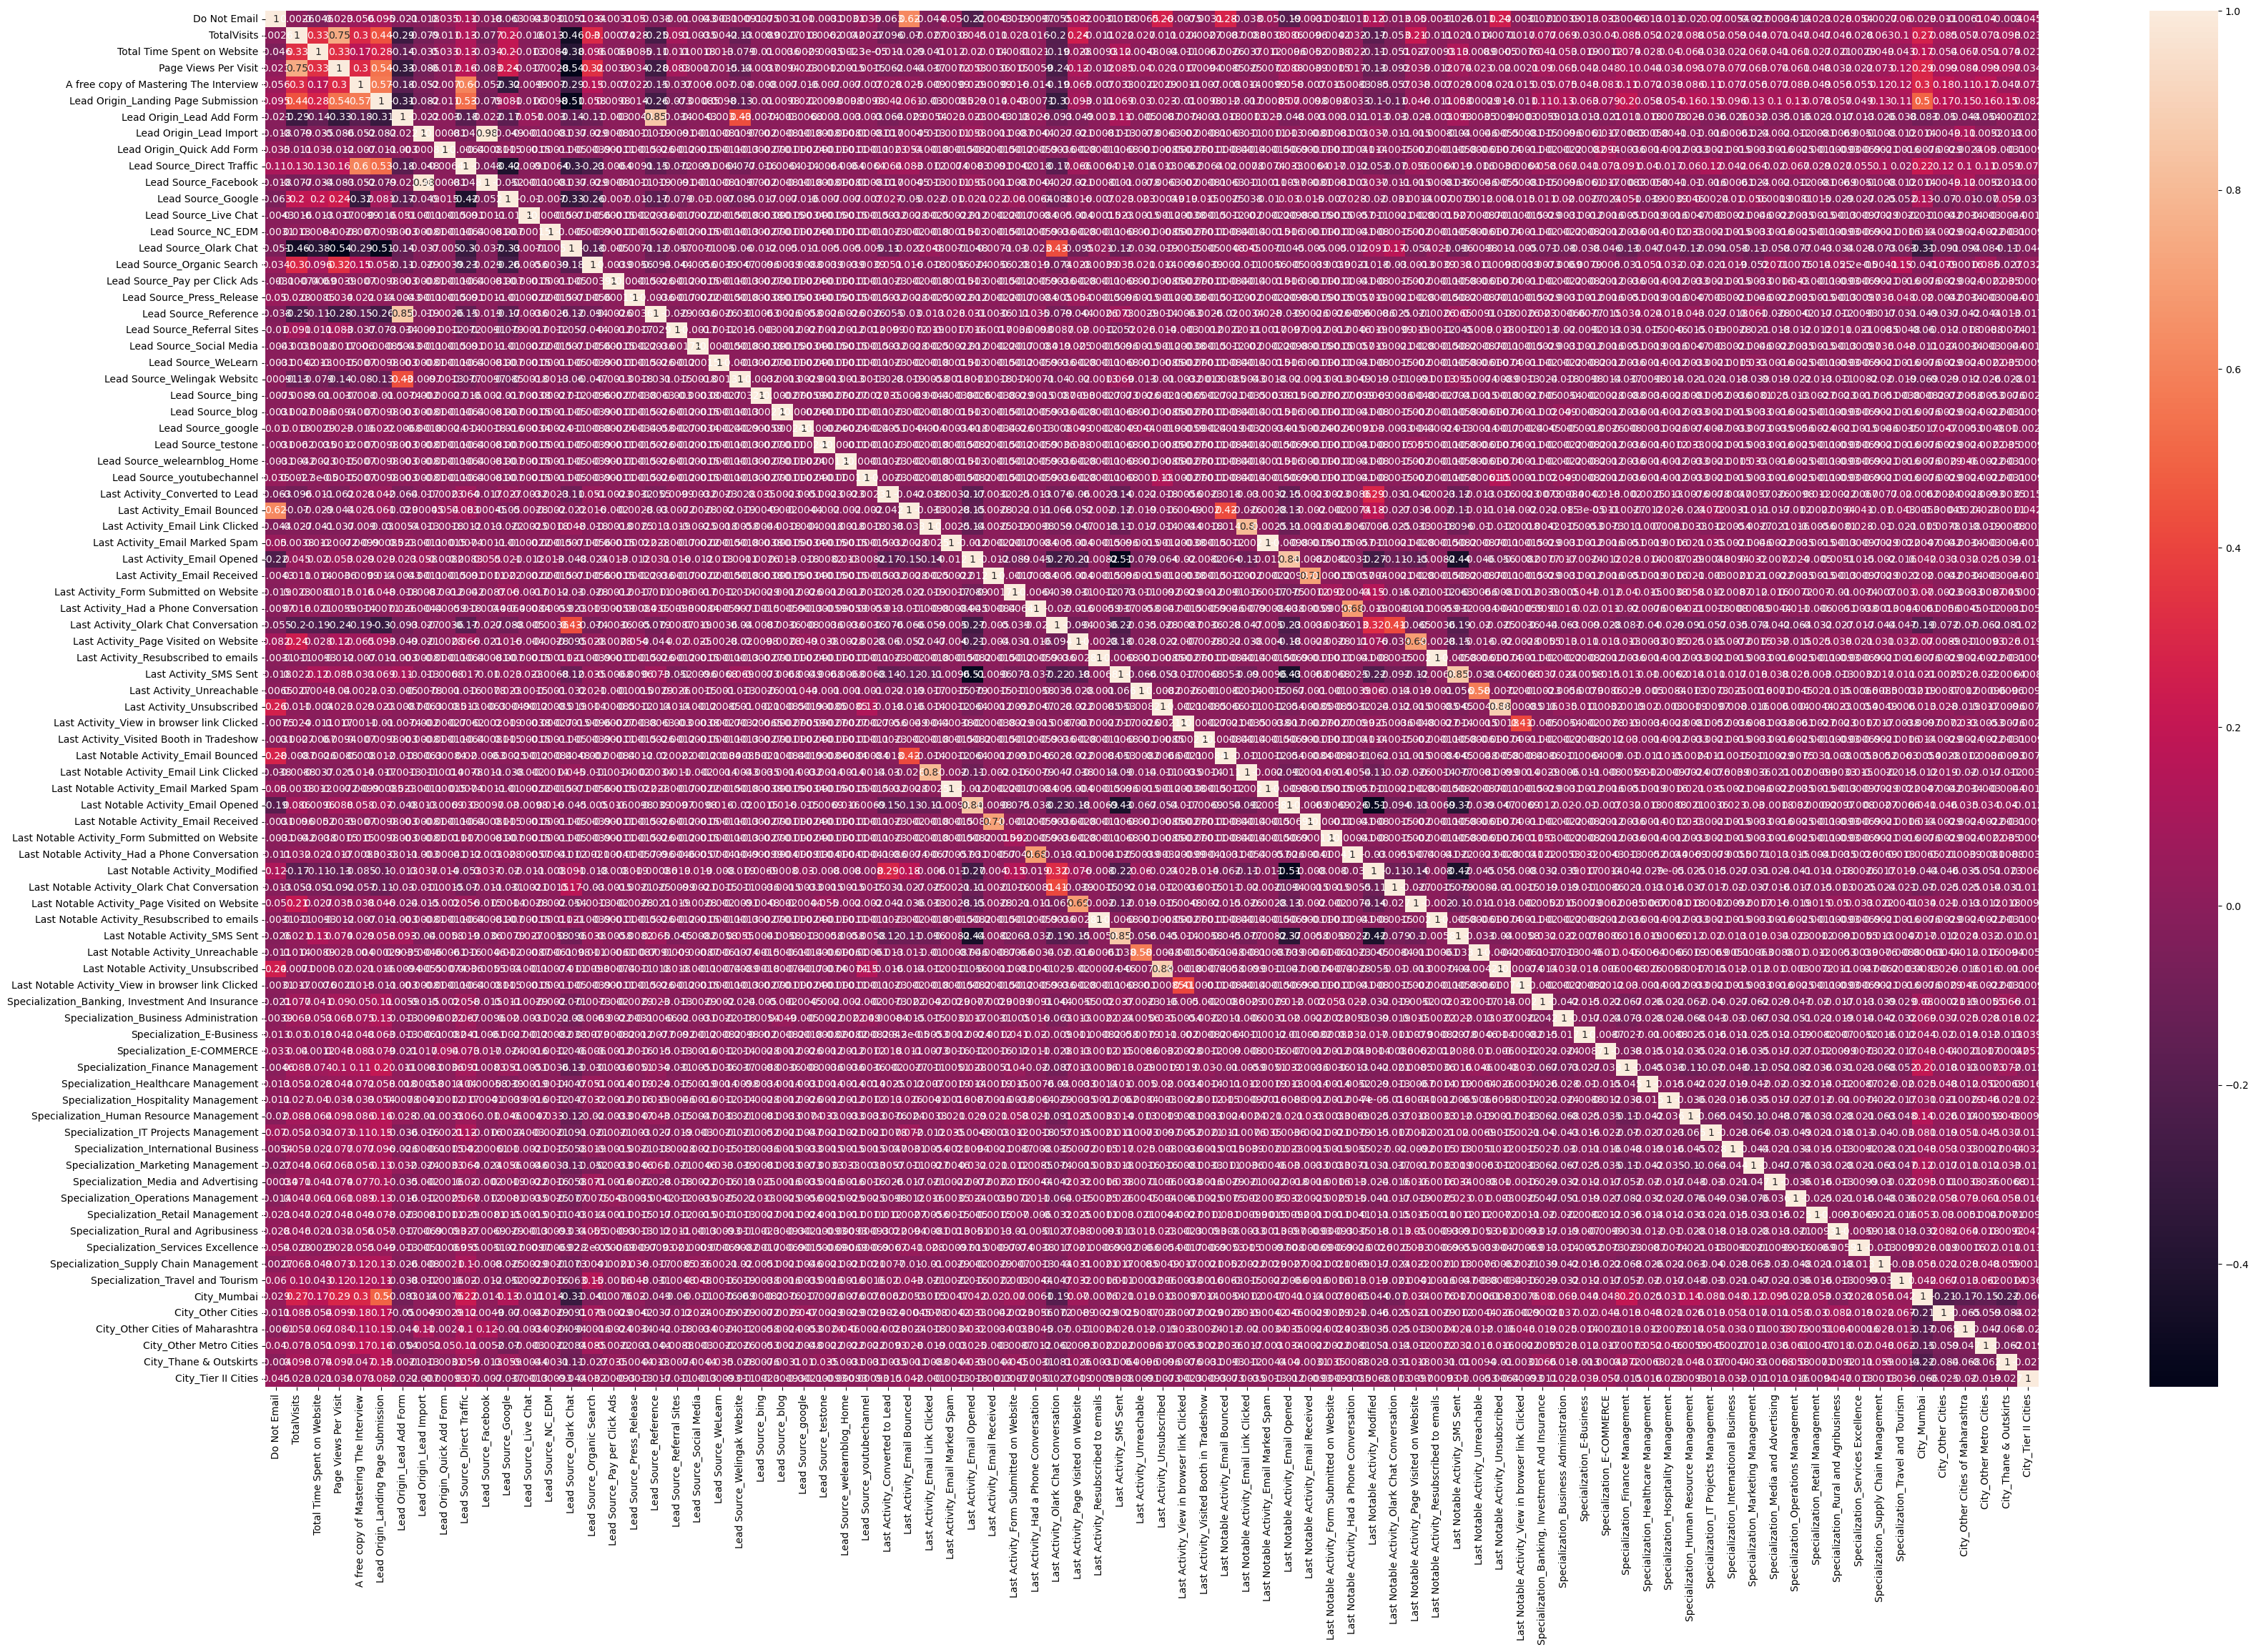

In [57]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,25))        # Size of the figure
sns.heatmap(Lead.corr(),annot = True)
plt.show()

As we couldn't get much information out of the correlation matrix due to lot of variables. Let's go ahead with the model building using RFE for feature selection.

### Step 9: Model Building

Using the **LogisticRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

#### Running Your First Training Model

In [58]:
import statsmodels.api as sm

In [59]:
# Building Logistic Regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6388
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 14 Apr 2024   Deviance:                   1.4893e+05
Time:                        10:01:56   Pearson chi2:                 7.28e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                               3.916e+15   4.58e+07   8.54e+07      0.000    3.92e+15    3.92e+15
Do Not Email                                       -7.082e+14   4.43e+06   -1.6e+08      0.000   -7.08e+14   -7.08e+14
TotalVisits                                         1.673e+14   1.36e+06   1.23e+08      0.000    1.67e+14    1.67e+14
Total Time Spent on Website                         4.803e+13   9.51e+05   5.05e+07      0.000     4.8e+13     4.8e+13
Page Views Per Visit                               -6.935e+13   1.49e+06  -4.66e+07      0.000   -6.93e+13   -6.93e+13
A free copy of Mastering The Interview             -3.387e+13   2.71e+06  -1.25e+07      0.000   -3.39e+13   -3.39e+13
Lead Origin_Landing Page Submission                -8.298e+14   3.68e+06  -2.25e+08      0.000    -8.3e+14    -8.3e+14
Lead Origin_Lead Add Form                           7.191e+14    1.3e+07   5.52e+07      0.000    7.19e+14    7.19e+14
Lead Origin_Lead Import                             2.906e+14    4.8e+07   6.06e+06      0.000    2.91e+14    2.91e+14
Lead Origin_Quick Add Form                          2.528e+15    6.8e+07   3.72e+07      0.000    2.53e+15    2.53e+15
Lead Source_Direct Traffic                         -4.068e+14   4.11e+07  -9.89e+06      0.000   -4.07e+14   -4.07e+14
Lead Source_Facebook                               -1.325e+15   6.31e+07   -2.1e+07      0.000   -1.32e+15   -1.32e+15
Lead Source_Google                                 -3.338e+14    4.1e+07  -8.14e+06      0.000   -3.34e+14   -3.34e+14
Lead Source_Live Chat                                3.92e+14   6.14e+07   6.38e+06      0.000    3.92e+14    3.92e+14
Lead Source_NC_EDM                                  4.392e+15   7.87e+07   5.58e+07      0.000    4.39e+15    4.39e+15
Lead Source_Olark Chat                             -4.555e+14   4.11e+07  -1.11e+07      0.000   -4.56e+14   -4.56e+14
Lead Source_Organic Search                         -3.819e+14   4.12e+07  -9.28e+06      0.000   -3.82e+14   -3.82e+14
Lead Source_Pay per Click Ads                      -3.932e+15   7.88e+07  -4.99e+07      0.000   -3.93e+15   -3.93e+15
Lead Source_Press_Release                          -3.461e+15   6.32e+07  -5.47e+07      0.000   -3.46e+15   -3.46e+15
Lead Source_Reference                              -2.823e+14    3.9e+07  -7.23e+06      0.000   -2.82e+14   -2.82e+14
Lead Source_Referral Sites                         -5.053e+14   4.17e+07  -1.21e+07      0.000   -5.05e+14   -5.05e+14
Lead Source_Social Media                             9.97e+14   6.29e+07   1.58e+07      0.000    9.97e+14    9.97e+14
Lead Source_WeLearn                                 4.746e+15   7.88e+07   6.02e+07      0.000    4.75e+15  

### Step 10: Feature Selection Using RFE

In [60]:
# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [61]:
# Importing RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [62]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False])

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 47),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 48),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Origin_Quick Add Form', False, 59),
 ('Lead Source_Direct Traffic', False, 39),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 44),
 ('Lead Source_Live Chat', False, 56),
 ('Lead Source_NC_EDM', False, 49),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Pay per Click Ads', False, 55),
 ('Lead Source_Press_Release', False, 54),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 43),
 ('Lead Source_Social Media', False, 27),
 ('Lead Source_WeLearn', False, 50),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 66),
 ('Lead Source_blog', F

In [64]:
col = X_train.columns[rfe.support_]

In [65]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       '

##### Assessing the model with StatsModels

In [66]:
# Creating X_train dataframe with RFE selected variables
X_train = X_train[col]

In [67]:
#building Logistic Regression model 2
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2870.9
Date:                Sun, 14 Apr 2024   Deviance:                       5741.7
Time:                        10:02:00   Pearson chi2:                 6.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3570
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2162      0.067      3.209      0.001       0.084       0.348
Do Not Email                                     -1.6571      0.163    -10.148      0.000      -1.977      -1.337
Total Time Spent on Website                       1.1176      0.038     29.131      0.000       1.042       1.193
Lead Origin_Lead Add Form                         4.0163      0.185     21.762      0.000       3.655       4.378
Lead Source_Olark Chat                            1.1546      0.100     11.535      0.000       0.958       1.351
Lead Source_Welingak Website                      1.6810      0.745      2.255      0.024       0.220       3.142
Last Activity_Had a Phone Conversation            1.6643      0.660      2.521      0.012       0.370       2.958
Last Activity_Olark Chat Conversation            -1.0867      0.188     -5.782      0.000      -1.455      -0.718
Last Notable Activity_Email Link Clicked         -1.8547      0.259     -7.175      0.000      -2.361      -1.348
Last Notable Activity_Email Opened               -1.3446      0.084    -16.035      0.000      -1.509      -1.180
Last Notable Activity_Modified                   -1.8740      0.092    -20.392      0.000      -2.054      -1.694
Last Notable Activity_Olark Chat Conversation    -1.6501      0.365     -4.522      0.000      -2.365      -0.935
Last Notable Activity_Page Visited on Website    -1.5824      0.184     -8.589      0.000      -1.944      -1.221
Specialization_Finance Management                 0.3353      0.105      3.181      0.001       0.129       0.542
Specialization_Healthcare Management              0.4050      0.253      1.603      0.109      -0.090       0.900
Specialization_Rural and Agribusiness             0.7301      0.371      1.969      0.049       0.003       1.457
=================================================================================================================
"""

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6           Last Activity_Olark Chat Conversation  1.90
3                          Lead Source_Olark Chat  1.65
9                  Last Notable Activity_Modified  1.56
2                       Lead Origin_Lead Add Form  1.31
10  Last Notable Activity_Olark Chat Conversation  1.31
4                    Lead Source_Welingak Website  1.22
1                     Total Time Spent on Website  1.18
8              Last Notable Activity_Email Opened  1.15
0                                    Do Not Email  1.11
12              Specialization_Finance Management  1.11
7        Last Notable Activity_Email Link Clicked  1.02
11  Last Notable Activity_Page Visited on Website  1.02
13           Specialization_Healthcare Management  1.02
5          Last Activity_Had a Phone Conversation  1.01
14          Specialization_Rural and Agribusiness  1.01

All VIF values are below 5. But some p-values are high. Let's drop `Specialization_Healthcare Management` as it has high p-value.

In [70]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop('Specialization_Healthcare Management', axis=1)

In [71]:
#building Logistic Regression model 3
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.2
Date:                Sun, 14 Apr 2024   Deviance:                       5744.3
Time:                        10:02:00   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3568
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2255      0.067      3.359      0.001       0.094       0.357
Do Not Email                                     -1.6511      0.163    -10.121      0.000      -1.971      -1.331
Total Time Spent on Website                       1.1182      0.038     29.151      0.000       1.043       1.193
Lead Origin_Lead Add Form                         4.0220      0.185     21.789      0.000       3.660       4.384
Lead Source_Olark Chat                            1.1479      0.100     11.485      0.000       0.952       1.344
Lead Source_Welingak Website                      1.6739      0.745      2.246      0.025       0.213       3.135
Last Activity_Had a Phone Conversation            1.6554      0.660      2.507      0.012       0.361       2.950
Last Activity_Olark Chat Conversation            -1.0865      0.188     -5.787      0.000      -1.454      -0.718
Last Notable Activity_Email Link Clicked         -1.8610      0.259     -7.198      0.000      -2.368      -1.354
Last Notable Activity_Email Opened               -1.3432      0.084    -16.026      0.000      -1.508      -1.179
Last Notable Activity_Modified                   -1.8759      0.092    -20.412      0.000      -2.056      -1.696
Last Notable Activity_Olark Chat Conversation    -1.6541      0.365     -4.534      0.000      -2.369      -0.939
Last Notable Activity_Page Visited on Website    -1.5885      0.184     -8.620      0.000      -1.950      -1.227
Specialization_Finance Management                 0.3261      0.105      3.098      0.002       0.120       0.532
Specialization_Rural and Agribusiness             0.7213      0.371      1.945      0.052      -0.006       1.448
=================================================================================================================
"""

##### Let's check the VIFs again

In [72]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6           Last Activity_Olark Chat Conversation  1.90
3                          Lead Source_Olark Chat  1.65
9                  Last Notable Activity_Modified  1.55
2                       Lead Origin_Lead Add Form  1.31
10  Last Notable Activity_Olark Chat Conversation  1.31
4                    Lead Source_Welingak Website  1.22
1                     Total Time Spent on Website  1.18
8              Last Notable Activity_Email Opened  1.14
0                                    Do Not Email  1.11
12              Specialization_Finance Management  1.10
7        Last Notable Activity_Email Link Clicked  1.02
11  Last Notable Activity_Page Visited on Website  1.02
5          Last Activity_Had a Phone Conversation  1.01
13          Specialization_Rural and Agribusiness  1.01

Let's drop `Specialization_Rural and Agribusiness` as it has high p-value.

In [73]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop('Specialization_Rural and Agribusiness', axis=1)

In [74]:
#building Logistic Regression model 4
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.0
Date:                Sun, 14 Apr 2024   Deviance:                       5748.0
Time:                        10:02:00   Pearson chi2:                 6.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3564
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2313      0.067      3.451      0.001       0.100       0.363
Do Not Email                                     -1.6444      0.163    -10.081      0.000      -1.964      -1.325
Total Time Spent on Website                       1.1174      0.038     29.148      0.000       1.042       1.193
Lead Origin_Lead Add Form                         4.0194      0.185     21.781      0.000       3.658       4.381
Lead Source_Olark Chat                            1.1436      0.100     11.452      0.000       0.948       1.339
Lead Source_Welingak Website                      1.6679      0.745      2.238      0.025       0.207       3.128
Last Activity_Had a Phone Conversation            1.6493      0.660      2.499      0.012       0.356       2.943
Last Activity_Olark Chat Conversation            -1.0901      0.188     -5.808      0.000      -1.458      -0.722
Last Notable Activity_Email Link Clicked         -1.8646      0.259     -7.213      0.000      -2.371      -1.358
Last Notable Activity_Email Opened               -1.3410      0.084    -16.011      0.000      -1.505      -1.177
Last Notable Activity_Modified                   -1.8753      0.092    -20.417      0.000      -2.055      -1.695
Last Notable Activity_Olark Chat Conversation    -1.6525      0.365     -4.532      0.000      -2.367      -0.938
Last Notable Activity_Page Visited on Website    -1.5741      0.184     -8.560      0.000      -1.935      -1.214
Specialization_Finance Management                 0.3190      0.105      3.034      0.002       0.113       0.525
=================================================================================================================
"""

##### Let's check the VIFs again

In [75]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6           Last Activity_Olark Chat Conversation  1.90
3                          Lead Source_Olark Chat  1.65
9                  Last Notable Activity_Modified  1.55
2                       Lead Origin_Lead Add Form  1.31
10  Last Notable Activity_Olark Chat Conversation  1.31
4                    Lead Source_Welingak Website  1.22
1                     Total Time Spent on Website  1.18
8              Last Notable Activity_Email Opened  1.14
0                                    Do Not Email  1.11
12              Specialization_Finance Management  1.10
7        Last Notable Activity_Email Link Clicked  1.02
11  Last Notable Activity_Page Visited on Website  1.02
5          Last Activity_Had a Phone Conversation  1.01

Let's drop `Lead Source_Welingak Website` as it has high p-value.

In [76]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop('Lead Source_Welingak Website', axis=1)

In [77]:
#building Logistic Regression model 5
X_train_sm = sm.add_constant(X_train)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.9
Date:                Sun, 14 Apr 2024   Deviance:                       5755.9
Time:                        10:02:00   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3556
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2325      0.067      3.469      0.001       0.101       0.364
Do Not Email                                     -1.6352      0.162    -10.079      0.000      -1.953      -1.317
Total Time Spent on Website                       1.1171      0.038     29.137      0.000       1.042       1.192
Lead Origin_Lead Add Form                         4.2020      0.179     23.488      0.000       3.851       4.553
Lead Source_Olark Chat                            1.1428      0.100     11.444      0.000       0.947       1.339
Last Activity_Had a Phone Conversation            1.6401      0.661      2.480      0.013       0.344       2.936
Last Activity_Olark Chat Conversation            -1.0903      0.188     -5.806      0.000      -1.458      -0.722
Last Notable Activity_Email Link Clicked         -1.8624      0.258     -7.221      0.000      -2.368      -1.357
Last Notable Activity_Email Opened               -1.3414      0.084    -16.019      0.000      -1.506      -1.177
Last Notable Activity_Modified                   -1.8771      0.092    -20.447      0.000      -2.057      -1.697
Last Notable Activity_Olark Chat Conversation    -1.6572      0.365     -4.537      0.000      -2.373      -0.941
Last Notable Activity_Page Visited on Website    -1.5736      0.184     -8.565      0.000      -1.934      -1.213
Specialization_Finance Management                 0.3129      0.105      2.969      0.003       0.106       0.519
=================================================================================================================
"""

##### Let's check the VIFs again

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5           Last Activity_Olark Chat Conversation  1.90
3                          Lead Source_Olark Chat  1.65
8                  Last Notable Activity_Modified  1.55
9   Last Notable Activity_Olark Chat Conversation  1.31
1                     Total Time Spent on Website  1.18
7              Last Notable Activity_Email Opened  1.14
0                                    Do Not Email  1.11
11              Specialization_Finance Management  1.10
2                       Lead Origin_Lead Add Form  1.09
6        Last Notable Activity_Email Link Clicked  1.02
10  Last Notable Activity_Page Visited on Website  1.02
4          Last Activity_Had a Phone Conversation  1.00

Let's drop `Last Activity_Had a Phone Conversation` as it has high p-value.

In [79]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop('Last Activity_Had a Phone Conversation', axis=1)

In [80]:
#building Logistic Regression model 6
X_train_sm = sm.add_constant(X_train)
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2881.7
Date:                Sun, 14 Apr 2024   Deviance:                       5763.5
Time:                        10:02:00   Pearson chi2:                 6.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3549
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2448      0.067      3.663      0.000       0.114       0.376
Do Not Email                                     -1.6442      0.162    -10.130      0.000      -1.962      -1.326
Total Time Spent on Website                       1.1167      0.038     29.158      0.000       1.042       1.192
Lead Origin_Lead Add Form                         4.2045      0.179     23.514      0.000       3.854       4.555
Lead Source_Olark Chat                            1.1364      0.100     11.388      0.000       0.941       1.332
Last Activity_Olark Chat Conversation            -1.0984      0.188     -5.852      0.000      -1.466      -0.731
Last Notable Activity_Email Link Clicked         -1.8721      0.258     -7.258      0.000      -2.378      -1.367
Last Notable Activity_Email Opened               -1.3517      0.084    -16.154      0.000      -1.516      -1.188
Last Notable Activity_Modified                   -1.8767      0.092    -20.474      0.000      -2.056      -1.697
Last Notable Activity_Olark Chat Conversation    -1.6561      0.365     -4.535      0.000      -2.372      -0.940
Last Notable Activity_Page Visited on Website    -1.5837      0.184     -8.621      0.000      -1.944      -1.224
Specialization_Finance Management                 0.3058      0.105      2.902      0.004       0.099       0.512
=================================================================================================================
"""

##### Let's check the VIFs again

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4           Last Activity_Olark Chat Conversation  1.89
3                          Lead Source_Olark Chat  1.65
7                  Last Notable Activity_Modified  1.55
8   Last Notable Activity_Olark Chat Conversation  1.31
1                     Total Time Spent on Website  1.18
6              Last Notable Activity_Email Opened  1.14
0                                    Do Not Email  1.11
10              Specialization_Finance Management  1.10
2                       Lead Origin_Lead Add Form  1.09
5        Last Notable Activity_Email Link Clicked  1.02
9   Last Notable Activity_Page Visited on Website  1.02

Let's drop `Specialization_Finance Management` as it has high p-value.

In [82]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop('Specialization_Finance Management', axis=1)

In [83]:
#building Logistic Regression model 7
X_train_sm = sm.add_constant(X_train)
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2885.9
Date:                Sun, 14 Apr 2024   Deviance:                       5771.8
Time:                        10:02:01   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3540
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2848      0.065      4.357      0.000       0.157       0.413
Do Not Email                                     -1.6506      0.162    -10.163      0.000      -1.969      -1.332
Total Time Spent on Website                       1.1154      0.038     29.169      0.000       1.040       1.190
Lead Origin_Lead Add Form                         4.1944      0.179     23.486      0.000       3.844       4.544
Lead Source_Olark Chat                            1.1034      0.099     11.159      0.000       0.910       1.297
Last Activity_Olark Chat Conversation            -1.1087      0.188     -5.911      0.000      -1.476      -0.741
Last Notable Activity_Email Link Clicked         -1.8743      0.258     -7.277      0.000      -2.379      -1.370
Last Notable Activity_Email Opened               -1.3491      0.084    -16.137      0.000      -1.513      -1.185
Last Notable Activity_Modified                   -1.8766      0.092    -20.492      0.000      -2.056      -1.697
Last Notable Activity_Olark Chat Conversation    -1.6268      0.362     -4.495      0.000      -2.336      -0.917
Last Notable Activity_Page Visited on Website    -1.5818      0.184     -8.617      0.000      -1.942      -1.222
=================================================================================================================
"""

##### Let's check the VIFs again

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4          Last Activity_Olark Chat Conversation  1.89
3                         Lead Source_Olark Chat  1.65
7                 Last Notable Activity_Modified  1.51
8  Last Notable Activity_Olark Chat Conversation  1.30
1                    Total Time Spent on Website  1.17
0                                   Do Not Email  1.11
6             Last Notable Activity_Email Opened  1.09
2                      Lead Origin_Lead Add Form  1.08
5       Last Notable Activity_Email Link Clicked  1.02
9  Last Notable Activity_Page Visited on Website  1.02

Now both p-values and VIFs are low. Model7 is the best fit model so far, we can go ahead with the model evaluation.

### Step 11: Model Evaluation

In [85]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.279202
6795    0.257711
3516    0.324738
8105    0.859075
3934    0.186040
4844    0.913944
3297    0.132576
8071    0.909784
987     0.285777
7423    0.923245
dtype: float64

In [86]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.27920157, 0.25771116, 0.32473802, 0.85907488, 0.18603984,
       0.91394416, 0.13257601, 0.90978373, 0.28577697, 0.92324476])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [87]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ProsID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  ProsID
0          0        0.279202    1871
1          0        0.257711    6795
2          0        0.324738    3516
3          0        0.859075    8105
4          0        0.186040    3934

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  ProsID  predicted
0          0        0.279202    1871          0
1          0        0.257711    6795          0
2          0        0.324738    3516          0
3          0        0.859075    8105          1
4          0        0.186040    3934          0

In [89]:
from sklearn import metrics

In [90]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3498  504]
 [ 815 1651]]


In [91]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7960729746444032


### Step 12: Metrics beyond simply accuracy

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6695052716950527

In [94]:
# Let us calculate specificity
TN / float(TN+FP)

0.8740629685157422

In [95]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.12593703148425786


In [96]:
# positive predictive value 
print (TP / float(TP+FP))

0.7661252900232018


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8110364015766288


### Step 13: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [98]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

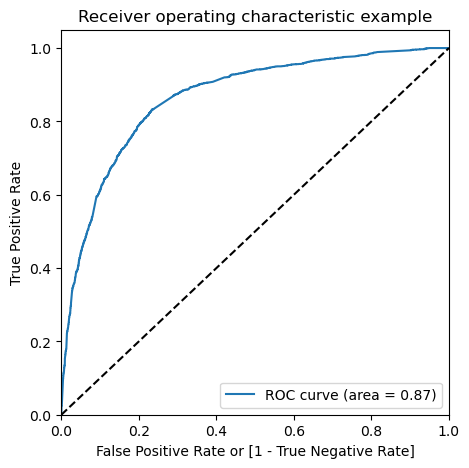

In [100]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 14: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  ProsID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.279202    1871          0    1    1    1    0    0    0   
1          0        0.257711    6795          0    1    1    1    0    0    0   
2          0        0.324738    3516          0    1    1    1    1    0    0   
3          0        0.859075    8105          1    1    1    1    1    1    1   
4          0        0.186040    3934          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    1    0  
4    0    0    0    0

In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.559215  0.971208  0.305347
0.2   0.2  0.739951  0.902271  0.639930
0.3   0.3  0.791126  0.826845  0.769115
0.4   0.4  0.795609  0.756691  0.819590
0.5   0.5  0.796073  0.669505  0.874063
0.6   0.6  0.776438  0.545012  0.919040
0.7   0.7  0.760049  0.459043  0.945527
0.8   0.8  0.737322  0.367802  0.965017
0.9   0.9  0.678726  0.176399  0.988256


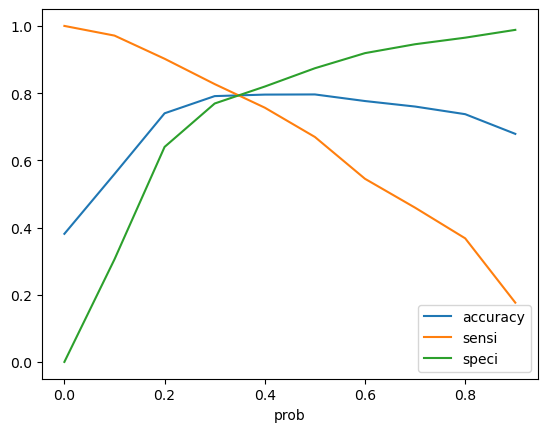

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [104]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  ProsID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.279202    1871          0    1    1    1    0    0    0   
1          0        0.257711    6795          0    1    1    1    0    0    0   
2          0        0.324738    3516          0    1    1    1    1    0    0   
3          0        0.859075    8105          1    1    1    1    1    1    1   
4          0        0.186040    3934          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    1    1    1    0                1  
4    0    0    0    0                0

In [105]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7965367965367965

In [106]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3211,  791],
       [ 525, 1941]], dtype=int64)

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7871046228710462

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.8023488255872064

In [110]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.1976511744127936


In [111]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7104685212298683


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.859475374732334


### Precision and Recall

Using sklearn utilities for the same

In [113]:
from sklearn.metrics import precision_score, recall_score

In [114]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7661252900232018

In [115]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6695052716950527

### Precision and recall tradeoff

In [116]:
from sklearn.metrics import precision_recall_curve

In [117]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

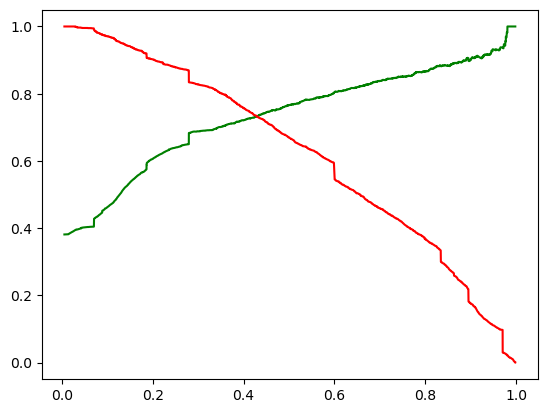

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 15: Making predictions on the test set

In [120]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(
    X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [121]:
col = X_train.columns

In [122]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4269             0                     0.964504                          0   
2376             0                    -0.885371                          1   
7766             0                    -0.777416                          0   
9199             0                    -0.885371                          0   
4359             0                    -0.885371                          1   

      Lead Source_Olark Chat  Last Activity_Olark Chat Conversation  \
4269                       0                                      0   
2376                       0                                      0   
7766                       0                                      0   
9199                       1                                      1   
4359                       0                                      0   

      Last Notable Activity_Email Link Clicked  \
4269                                         0   
2376                                         0   
7766                                         0   
9199                                         0   
4359                                         0   

      Last Notable Activity_Email Opened  Last Notable Activity_Modified  \
4269                                   0                               0   
2376                                   0                               0   
7766                                   0                               0   
9199                                   0                               1   
4359                                   1                               0   

      Last Notable Activity_Olark Chat Conversation  \
4269                                              0   
2376                                              0   
7766                                              0   
9199                                              0   
4359                                              0   

      Last Notable Activity_Page Visited on Website  
4269                                              0  
2376                                              0  
7766                                              0  
9199                                              0  
4359                                              0

In [123]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [124]:
y_test_pred = res.predict(X_test_sm)

In [125]:
y_test_pred[:10]

4269    0.795866
2376    0.970449
7766    0.358391
9199    0.070132
4359    0.894970
9186    0.633278
1631    0.503914
8963    0.181700
8007    0.132701
5324    0.407039
dtype: float64

In [126]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [127]:
# Let's see the head
y_pred_1.head()

0
4269  0.795866
2376  0.970449
7766  0.358391
9199  0.070132
4359  0.894970

In [128]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [129]:
# Putting CustID to index
y_test_df['ProsID'] = y_test_df.index

In [130]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [131]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [132]:
y_pred_final.head()

Converted  ProsID         0
0          1    4269  0.795866
1          1    2376  0.970449
2          1    7766  0.358391
3          0    9199  0.070132
4          1    4359  0.894970

In [133]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [134]:
# Rearranging the columns
y_pred_final = y_pred_final.iloc[:,[1,0,2]]

In [135]:
# Let's see the head of y_pred_final
y_pred_final.head()

ProsID  Converted  Converted_Prob
0    4269          1        0.795866
1    2376          1        0.970449
2    7766          1        0.358391
3    9199          0        0.070132
4    4359          1        0.894970

In [136]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [137]:
y_pred_final.head()

ProsID  Converted  Converted_Prob  final_predicted
0    4269          1        0.795866                1
1    2376          1        0.970449                1
2    7766          1        0.358391                0
3    9199          0        0.070132                0
4    4359          1        0.894970                1

In [138]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8001443001443002

In [139]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1363,  314],
       [ 240,  855]], dtype=int64)

In [140]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7808219178082192

In [142]:
# Let us calculate specificity
TN / float(TN+FP)

0.8127608825283243

In [143]:
# Let's calculate Precision Score
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7313943541488451

In [144]:
# Let's calculate Recall Score
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7808219178082192

### Step 16: Assigning Lead Score Values

In [145]:
#Printing the head of the original Leads dataframe 'df'
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [146]:
#Adding 'ProsID' column to the 'df' dataframe with index numbers
df['ProsID']=df.rename(index=str).index
df['ProsID']=df['ProsID'].astype(int)

In [147]:
#Deriving 'Lead Score' values from the predicted 'converted_Prob' on the final 'y_train_pred_final' dataframe of the train set
y_train_pred_final['Lead Score'] = round(y_train_pred_final['Converted_Prob']*100).astype(int)
y_train_pred_final.head()

Converted  Converted_Prob  ProsID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.279202    1871          0    1    1    1    0    0    0   
1          0        0.257711    6795          0    1    1    1    0    0    0   
2          0        0.324738    3516          0    1    1    1    1    0    0   
3          0        0.859075    8105          1    1    1    1    1    1    1   
4          0        0.186040    3934          0    1    1    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  Lead Score  
0    0    0    0    0                0          28  
1    0    0    0    0                0          26  
2    0    0    0    0                0          32  
3    1    1    1    0                1          86  
4    0    0    0    0                0          19

In [148]:
#Deriving 'Lead Score' values from the predicted 'converted_Prob' on the final 'y_pred_final' dataframe of the test set
y_pred_final['Lead Score'] = round(y_pred_final['Converted_Prob']*100).astype(int)
y_pred_final.head()

ProsID  Converted  Converted_Prob  final_predicted  Lead Score
0    4269          1        0.795866                1          80
1    2376          1        0.970449                1          97
2    7766          1        0.358391                0          36
3    9199          0        0.070132                0           7
4    4359          1        0.894970                1          89

In [149]:
#Creating a new dataframe 'train_set' for 'ProsID','Lead Score' columns from 'y_train_pred_final'
train_set = y_train_pred_final[['ProsID','Lead Score']]
train_set

ProsID  Lead Score
0       1871          28
1       6795          26
2       3516          32
3       8105          86
4       3934          19
...      ...         ...
6463     350          89
6464      79          95
6465    8039          28
6466    6936          11
6467    5640          19

[6468 rows x 2 columns]

In [150]:
#Creating a new dataframe 'test_set' for 'ProsID','Lead Score' columns from 'y_pred_final'
test_set = y_pred_final[['ProsID','Lead Score']]
test_set

ProsID  Lead Score
0       4269          80
1       2376          97
2       7766          36
3       9199           7
4       4359          89
...      ...         ...
2767    8649          16
2768    2152          97
2769    7101          28
2770    5331          28
2771    2960          97

[2772 rows x 2 columns]

In [151]:
#Concatenating both 'train_set' and 'test_set' vertically
Lead_Score = pd.concat([train_set,test_set],axis=0)
Lead_Score.head()

ProsID  Lead Score
0    1871          28
1    6795          26
2    3516          32
3    8105          86
4    3934          19

In [152]:
#Merging both 'df' and 'Lead_Score' dataframes on 'ProsID'
Lead_Score_df = df.merge(Lead_Score, how='left', on='ProsID')
Lead_Score_df

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ...                City  \
0                     0.00  ...              Select   
1                     2.50  ...              Select   
2                     2.00  ...              Mumbai   
3                     1.00  ...              Mumbai   
4                     1.00  ...              Mumbai   
...                    ...  ...                 ...   
9235                  2.67  ...              Mumbai   
9236                  2.00  ...              Mumbai   
9237                  2.00  ...              Mumbai   
9238                  3.00  ...  Other Metro Cities   
9239                  3.00  ...        Other Cities   

     Asymmetrique Activity Index Asymmetrique Profile Index  \
0                      02.Medium                  02.Medium   
1                      02.Medium                  02.Medium   
2                      02.Medium                    01.High   
3                      02.Medium                    01.High   
4                      02.Medium                    01.High   
...                          ...                        ...   
9235                   02.Medium                    01.High   
9236                   02.Medium                    01.High   
9237                   02.Medium                    01.High   
9238                   02.Medium                  02.Medium   
9239                   02.Medium                    01.High   

     Asymmetrique Activity Score Asymmetrique Profile Score  \
0                           15.0                       15.0   
1                           15.0                       15.0   
2                           14.0                       20.0   
3                           13

Lead Score values are added to the dataframe.